In [1]:
url = 'https://www.gutenberg.org/files/2701/2701-h/2701-h.htm'

In [3]:
import requests

In [4]:
r = requests.get(url)

In [5]:
type(r)

requests.models.Response

In [6]:
html = r.text

In [7]:
html

'<?xml version="1.0" encoding="utf-8"?>\r\n\r\n<!DOCTYPE html\r\n   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >\r\n\r\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\r\n  <head>\r\n    <title>\r\n      Moby Dick; Or the Whale, by Herman Melville\r\n    </title>\r\n    <style type="text/css" xml:space="preserve">\r\n\r\n    body { margin:5%; background:#faebd0; text-align:justify}\r\n    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }\r\n    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }\r\n    hr  { width: 50%; text-align: center;}\r\n    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }\r\n    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}\r\n    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 9

In [8]:
from bs4 import BeautifulSoup

In [10]:
soup = BeautifulSoup(html, 'html5lib')

In [11]:
type(soup)

bs4.BeautifulSoup

In [12]:
soup

<!--?xml version="1.0" encoding="utf-8"?--><!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html lang="en" xmlns="http://www.w3.org/1999/xhtml"><head>
    <title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>
    <style type="text/css" xml:space="preserve">

    body { margin:5%; background:#faebd0; text-align:justify}
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
   

In [14]:
soup.title

<title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>

In [15]:
soup.title.string

'\n      Moby Dick; Or the Whale, by Herman Melville\n    '

In [17]:
soup.findAll('a')[:8]

[<a href="#link2H_4_0002"> ETYMOLOGY. </a>,
 <a href="#link2H_4_0003"> EXTRACTS (Supplied by a Sub-Sub-Librarian).
         </a>,
 <a href="#link2HCH0001"> CHAPTER 1. Loomings. </a>,
 <a href="#link2HCH0002"> CHAPTER 2. The Carpet-Bag. </a>,
 <a href="#link2HCH0003"> CHAPTER 3. The Spouter-Inn. </a>,
 <a href="#link2HCH0004"> CHAPTER 4. The Counterpane. </a>,
 <a href="#link2HCH0005"> CHAPTER 5. Breakfast. </a>,
 <a href="#link2HCH0006"> CHAPTER 6. The Street. </a>]

In [18]:
text = soup.get_text()

In [19]:
text

'\n    \n      Moby Dick; Or the Whale, by Herman Melville\n    \n    \n\n    body { margin:5%; background:#faebd0; text-align:justify}\n    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }\n    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }\n    hr  { width: 50%; text-align: center;}\n    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }\n    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}\n    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}\n    .toc       { margin-left: 10%; margin-bottom: .75em;}\n    .toc2      { margin-left: 20%;}\n    div.fig    { display:block; margin:0 auto; text-align:center; }\n    div.middle { margin-left: 20%; margin-right: 20%; text-align: justify; }\n    .figleft   {float: left; margin-left: 0%; margin-right: 1%;}\n    .figr

In [20]:
import re

In [21]:
tokens = re.findall('\w+', text)

In [22]:
tokens[:8]

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

In [23]:
from nltk.tokenize import RegexpTokenizer

In [24]:
tokenizer = RegexpTokenizer('\w+')

In [25]:
tokens = tokenizer.tokenize(text)

In [26]:
tokens[:8]

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

In [27]:
words = []

In [28]:
for word in tokens:
    words.append(word.lower())

In [29]:
words[:8]

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']

In [30]:
import nltk

In [31]:
sw = nltk.corpus.stopwords.words('english')

In [32]:
sw[:8]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

In [33]:
words_ns = []

In [35]:
for word in words:
    if word not in sw:
        words_ns.append(word)

In [38]:
words_ns[:8]

['moby', 'dick', 'whale', 'herman', 'melville', 'body', 'margin', '5']

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

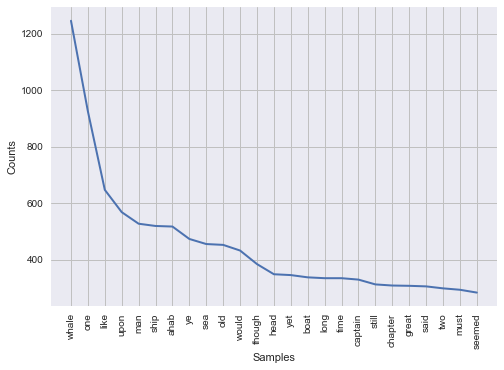

In [40]:
freqdis1 = nltk.FreqDist(words_ns)
freqdis1.plot(25)

In [45]:
from wordcloud import WordCloud

In [59]:
wordcloud = WordCloud(background_color="white", max_words=100).generate(' '.join(words_ns))

(-0.5, 399.5, 199.5, -0.5)

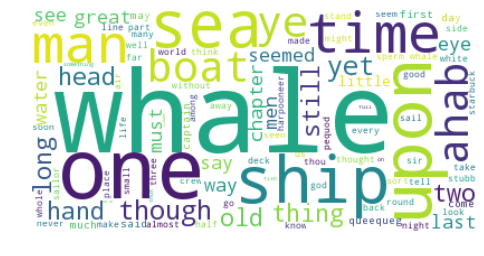

In [60]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [41]:
def plot_word_freq(url):
    """Takes a url (from Project Gutenberg) and plots a word frequency
    distribution"""
    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(25)

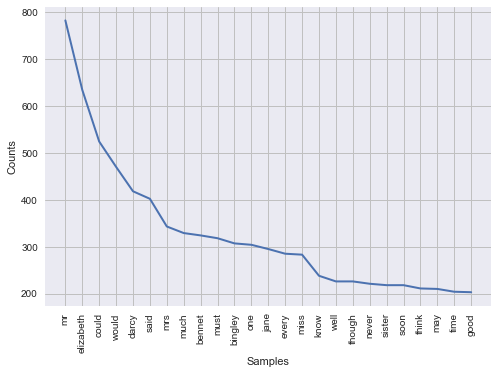

In [42]:
#Pride and Prejudice:
plot_word_freq('https://www.gutenberg.org/files/42671/42671-h/42671-h.htm')

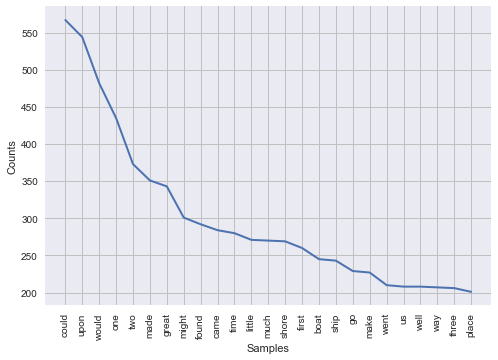

In [43]:
#Robinson Crusoe
plot_word_freq('https://www.gutenberg.org/files/521/521-h/521-h.htm')

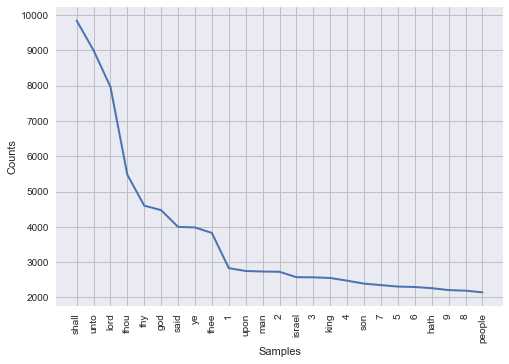

In [44]:
#The King James Bible
plot_word_freq('https://www.gutenberg.org/files/10/10-h/10-h.htm')